## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

W0420 19:02:44.933809 14680 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0420 19:02:44.945809 14680 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0420 19:02:44.947809 14680 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
"""
Compile 模型
"""
model.summary()

# optimizer = keras.optimizers.Adam(lr=0.001)
optimizer = keras.optimizers.SGD(lr=0.001)

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0420 19:02:45.008835 14680 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0420 19:02:45.014838 14680 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0420 19:02:45.094835 14680 deprecation.py:323] From D:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0420 19:02:45.137835 14680 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 63us/step - loss: 2.2710 - acc: 0.1439 - val_loss: 2.2293 - val_acc: 0.1902
Epoch 2/500
50000/50000 [==============================] - 2s 38us/step - loss: 2.2020 - acc: 0.2121 - val_loss: 2.1743 - val_acc: 0.2307
Epoch 3/500
50000/50000 [==============================] - 2s 38us/step - loss: 2.1506 - acc: 0.2427 - val_loss: 2.1271 - val_acc: 0.2545
Epoch 4/500
50000/50000 [==============================] - 2s 38us/step - loss: 2.1052 - acc: 0.2634 - val_loss: 2.0839 - val_acc: 0.2765
Epoch 5/500
50000/50000 [==============================] - 2s 38us/step - loss: 2.0644 - acc: 0.2794 - val_loss: 2.0464 - val_acc: 0.2819
Epoch 6/500
50000/50000 [==============================] - 2s 38us/step - loss: 2.0304 - acc: 0.2911 - val_loss: 2.0160 - val_acc: 0.2927
Epoch 7/500
50000/50000 [==============================] - 2s 38us/step - loss: 2.0024 - acc: 0.3010 - val_loss: 1.9898 - 

50000/50000 [==============================] - 2s 38us/step - loss: 1.6691 - acc: 0.4193 - val_loss: 1.6746 - val_acc: 0.4125
Epoch 60/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.6663 - acc: 0.4208 - val_loss: 1.6748 - val_acc: 0.4143
Epoch 61/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.6634 - acc: 0.4220 - val_loss: 1.6690 - val_acc: 0.4163
Epoch 62/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.6603 - acc: 0.4230 - val_loss: 1.6704 - val_acc: 0.4186
Epoch 63/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.6575 - acc: 0.4234 - val_loss: 1.6639 - val_acc: 0.4165
Epoch 64/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.6546 - acc: 0.4251 - val_loss: 1.6615 - val_acc: 0.4184
Epoch 65/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.6519 - acc: 0.4250 - val_loss: 1.6607 - val_acc: 0.4199
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.5295 - acc: 0.4684 - val_loss: 1.5551 - val_acc: 0.4523
Epoch 119/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.5276 - acc: 0.4694 - val_loss: 1.5529 - val_acc: 0.4563
Epoch 120/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.5257 - acc: 0.4692 - val_loss: 1.5508 - val_acc: 0.4566
Epoch 121/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.5239 - acc: 0.4705 - val_loss: 1.5490 - val_acc: 0.4562
Epoch 122/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.5218 - acc: 0.4697 - val_loss: 1.5475 - val_acc: 0.4556
Epoch 123/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.5200 - acc: 0.4708 - val_loss: 1.5464 - val_acc: 0.4579
Epoch 124/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.5183 - acc: 0.4712 - val_loss: 1.5489 - val_acc: 0.4558
Epoch 125/500
50000/

50000/50000 [==============================] - 2s 38us/step - loss: 1.4343 - acc: 0.4993 - val_loss: 1.4841 - val_acc: 0.4801
Epoch 177/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.4326 - acc: 0.5001 - val_loss: 1.4934 - val_acc: 0.4699
Epoch 178/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.4311 - acc: 0.5000 - val_loss: 1.4800 - val_acc: 0.4748
Epoch 179/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.4294 - acc: 0.5011 - val_loss: 1.4807 - val_acc: 0.4794
Epoch 180/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.4283 - acc: 0.5003 - val_loss: 1.4780 - val_acc: 0.4784
Epoch 181/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.4264 - acc: 0.5030 - val_loss: 1.4990 - val_acc: 0.4728
Epoch 182/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.4250 - acc: 0.5019 - val_loss: 1.4766 - val_acc: 0.4767
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 2s 37us/step - loss: 1.3532 - acc: 0.5261 - val_loss: 1.4309 - val_acc: 0.4945
Epoch 235/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.3519 - acc: 0.5261 - val_loss: 1.4437 - val_acc: 0.4822
Epoch 236/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.3504 - acc: 0.5265 - val_loss: 1.4272 - val_acc: 0.4928
Epoch 237/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.3490 - acc: 0.5283 - val_loss: 1.4296 - val_acc: 0.4922
Epoch 238/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.3486 - acc: 0.5266 - val_loss: 1.4327 - val_acc: 0.4930
Epoch 239/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.3467 - acc: 0.5285 - val_loss: 1.4357 - val_acc: 0.4871
Epoch 240/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.3453 - acc: 0.5289 - val_loss: 1.4297 - val_acc: 0.4912
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 2s 40us/step - loss: 1.2817 - acc: 0.5515 - val_loss: 1.4047 - val_acc: 0.4981
Epoch 293/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.2816 - acc: 0.5510 - val_loss: 1.3964 - val_acc: 0.5017
Epoch 294/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.2791 - acc: 0.5529 - val_loss: 1.4109 - val_acc: 0.5007
Epoch 295/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.2787 - acc: 0.5519 - val_loss: 1.4074 - val_acc: 0.5010
Epoch 296/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.2773 - acc: 0.5520 - val_loss: 1.4039 - val_acc: 0.5019
Epoch 297/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.2766 - acc: 0.5531 - val_loss: 1.4030 - val_acc: 0.5035
Epoch 298/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.2744 - acc: 0.5543 - val_loss: 1.3918 - val_acc: 0.5057
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 2s 39us/step - loss: 1.2160 - acc: 0.5750 - val_loss: 1.3713 - val_acc: 0.5152
Epoch 351/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.2147 - acc: 0.5750 - val_loss: 1.3714 - val_acc: 0.5148
Epoch 352/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.2144 - acc: 0.5756 - val_loss: 1.3725 - val_acc: 0.5123
Epoch 353/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.2127 - acc: 0.5752 - val_loss: 1.3833 - val_acc: 0.5133
Epoch 354/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.2118 - acc: 0.5759 - val_loss: 1.3651 - val_acc: 0.5161
Epoch 355/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.2112 - acc: 0.5765 - val_loss: 1.3960 - val_acc: 0.5052
Epoch 356/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.2103 - acc: 0.5771 - val_loss: 1.3667 - val_acc: 0.5178
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 2s 39us/step - loss: 1.1559 - acc: 0.5951 - val_loss: 1.3549 - val_acc: 0.5256
Epoch 409/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.1540 - acc: 0.5980 - val_loss: 1.3472 - val_acc: 0.5231
Epoch 410/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.1521 - acc: 0.5974 - val_loss: 1.3838 - val_acc: 0.5159
Epoch 411/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.1519 - acc: 0.5974 - val_loss: 1.3770 - val_acc: 0.5160
Epoch 412/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.1517 - acc: 0.5976 - val_loss: 1.3477 - val_acc: 0.5249
Epoch 413/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.1488 - acc: 0.5984 - val_loss: 1.3587 - val_acc: 0.5201
Epoch 414/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.1480 - acc: 0.5990 - val_loss: 1.3657 - val_acc: 0.5217
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 2s 38us/step - loss: 1.0978 - acc: 0.6161 - val_loss: 1.3645 - val_acc: 0.5183
Epoch 467/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.0949 - acc: 0.6167 - val_loss: 1.3418 - val_acc: 0.5291
Epoch 468/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.0950 - acc: 0.6170 - val_loss: 1.3603 - val_acc: 0.5126
Epoch 469/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.0948 - acc: 0.6159 - val_loss: 1.3896 - val_acc: 0.5126
Epoch 470/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.0927 - acc: 0.6172 - val_loss: 1.3467 - val_acc: 0.5312
Epoch 471/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.0915 - acc: 0.6178 - val_loss: 1.3464 - val_acc: 0.5248
Epoch 472/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.0911 - acc: 0.6204 - val_loss: 1.3799 - val_acc: 0.5145
Epoch 473/500
50000/50000 [=======

# Epoch: 500 Optimizer: Adam

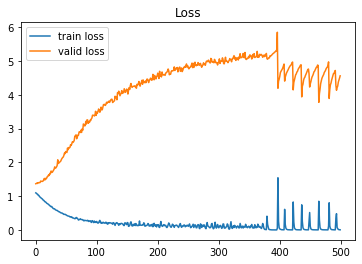

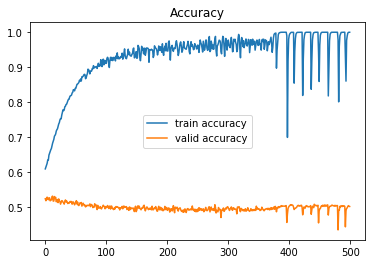

In [12]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# Epoch: 500 Optimizer: SGD

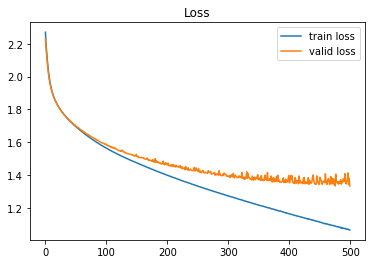

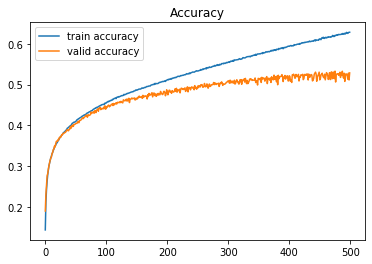

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()